# Magnitude to Photon Count

In this notebook we will use the [PySynPhot](https://pysynphot.readthedocs.io/en/latest/index.html) package to simulate the spectra of the some stars calculate the photon count rate of those stars.

We will use the PySynPhot to generate blackbody spectra and integrate over these.

## Setup
First we import the necessary packages and set the parameters of the two stars.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pysynphot as S
import os

plt.rcParams["figure.dpi"] = 120
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

# changing working directory so pysynphot can find the data
os.chdir("/Users/mcha5804/data/pysynphot/")

Setting stellar parameters -- I'm just gonna assume all stars have a surface temp of 5000 Kelvin -- if the surface temp is unknown you can also just assume a flat spectrum with PySynPhot.

In [19]:
primary = 10 * (100**2)  # cm^2
temperature = 5000  # K

HOST_A_MAG = 9.0
HOST_B_MAG = 9.0
HOST_C_MAG = 11.0
HOST_D_MAG = 11.0
HOST_E_MAG = 11.0
HOST_F_MAG = 11.0
HOST_G_MAG = 13.0
HOST_H_MAG = 13.0


print(f"TOLIMAN Primary Area: {primary:.2f} square cm.")

TOLIMAN Primary Area: 100000.00 square cm.


## Generating Spectra
Now we can generate the blackbody spectra and then renormalise the spectra to the given magnitudes of the stars (assuming the magnitudes to be Vega mags in the V band). We then convert the flux to units of photons $s^{-1}cm^{-2}\AA^{-1}$ and the wavelengths to $\AA$ (just use angstrom trust me its easier with pysynphot this way).

In [20]:
# creating spectra
A_sp = S.BlackBody(temperature)
B_sp = S.BlackBody(temperature)
C_sp = S.BlackBody(temperature)
D_sp = S.BlackBody(temperature)
E_sp = S.BlackBody(temperature)
F_sp = S.BlackBody(temperature)
G_sp = S.BlackBody(temperature)
H_sp = S.BlackBody(temperature)

# Renormalising to respective magnitudes
VBand = S.ObsBandpass("v")
A_sp = A_sp.renorm(RNval=HOST_A_MAG, RNUnits="vegamag", band=VBand)
B_sp = B_sp.renorm(RNval=HOST_B_MAG, RNUnits="vegamag", band=VBand)
C_sp = C_sp.renorm(RNval=HOST_C_MAG, RNUnits="vegamag", band=VBand)
D_sp = D_sp.renorm(RNval=HOST_D_MAG, RNUnits="vegamag", band=VBand)
E_sp = E_sp.renorm(RNval=HOST_E_MAG, RNUnits="vegamag", band=VBand)
F_sp = F_sp.renorm(RNval=HOST_F_MAG, RNUnits="vegamag", band=VBand)
G_sp = G_sp.renorm(RNval=HOST_G_MAG, RNUnits="vegamag", band=VBand)
H_sp = H_sp.renorm(RNval=HOST_H_MAG, RNUnits="vegamag", band=VBand)

# Converting units
A_sp.convert("Photlam")
B_sp.convert("Photlam")
C_sp.convert("Photlam")
D_sp.convert("Photlam")
E_sp.convert("Photlam")
F_sp.convert("Photlam")
G_sp.convert("Photlam")
H_sp.convert("Photlam")

# wrapping in a dictionary for easy access
spectra = {
    "A": A_sp,
    "B": B_sp,
    "C": C_sp,
    "D": D_sp,
    "E": E_sp,
    "F": F_sp,
    "G": G_sp,
    "H": H_sp,
}

We can now plot the spectra of the stars, as a sanity check.

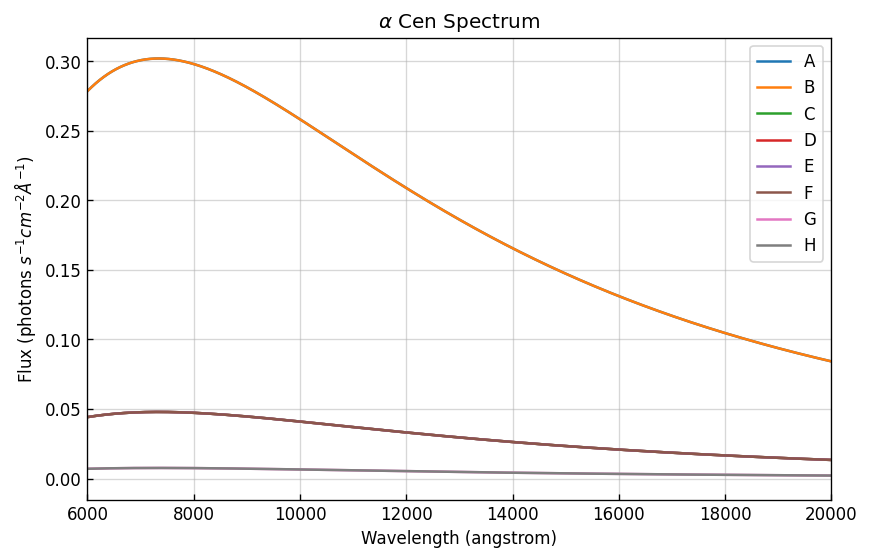

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
for host, spectrum in spectra.items():
    ax.plot(spectrum.wave, spectrum.flux, label=host)
ax.set(
    title=r"$\alpha$ Cen Spectrum",
    xlabel=f"Wavelength ({A_sp.waveunits})",
    ylabel=r"Flux (photons $s^{-1}cm^{-2}\AA^{-1}$)",
    xlim=(6000, 20000),
    xticks=np.linspace(6000, 20000, 8),
)
ax.grid(alpha=0.5)
ax.legend()
plt.show()

## Creating Bandpass
Great. Now we can generate the bandpass filters.

In [23]:
# creating pysynphot bandpass object
bp1 = S.Box(center=7600, width=10, waveunits="angstrom")
bp2 = S.Box(center=16500, width=10, waveunits="angstrom")
bp3 = S.Box(center=7600, width=100, waveunits="angstrom")
bp4 = S.Box(center=16500, width=100, waveunits="angstrom")

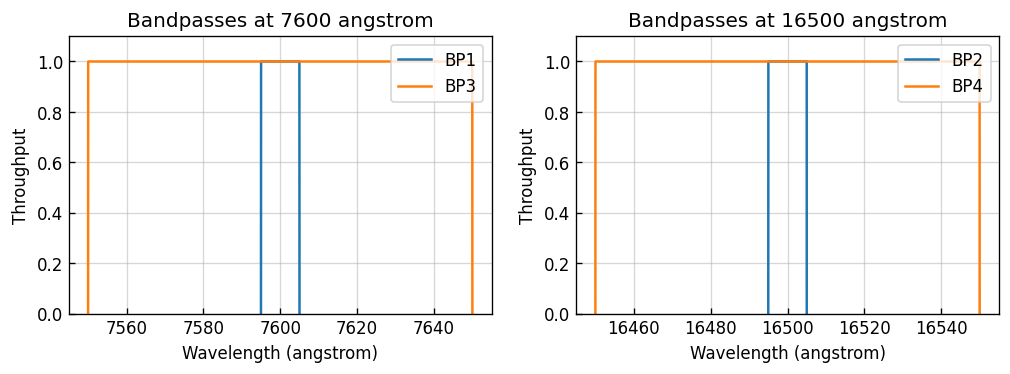

In [24]:
# plotting bandpasses

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(bp1.wave, bp1.throughput, label="BP1")
ax[0].plot(bp3.wave, bp3.throughput, label="BP3")

ax[1].plot(bp2.wave, bp2.throughput, label="BP2")
ax[1].plot(bp4.wave, bp4.throughput, label="BP4")

for axx, bp in zip(ax, [bp1, bp2]):
    axx.set(
        ylim=(0, 1.1),
        # xlim=(4000, 20000),
        xlabel=f"Wavelength ({bp.waveunits})",
        ylabel="Throughput",
        title=f"Bandpasses at {bp.center} {bp.waveunits}",
    )
    axx.legend(loc="upper right")
    axx.grid(alpha=0.5)

plt.show()

## Creating an Observation Object
Next we create a PySynPhot `Observation` object for each star, which combines the spectra and the bandpass filters we created.

In [25]:
# # creating observation objects
observations = {
    "A": S.Observation(A_sp, bp1),
    "B": S.Observation(B_sp, bp2),
    "C": S.Observation(C_sp, bp3),
    "D": S.Observation(D_sp, bp4),
    "E": S.Observation(E_sp, bp1),
    "F": S.Observation(F_sp, bp2),
    "G": S.Observation(G_sp, bp1),
    "H": S.Observation(H_sp, bp2),
}

(<pysynphot.spectrum.Box object at 0x13b3a5840>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b338760>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b24f2e0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b413460>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b3a5840>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b338760>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x13b3a5840>) does not have a defined binset in the w

Plotting as a final sanity check.

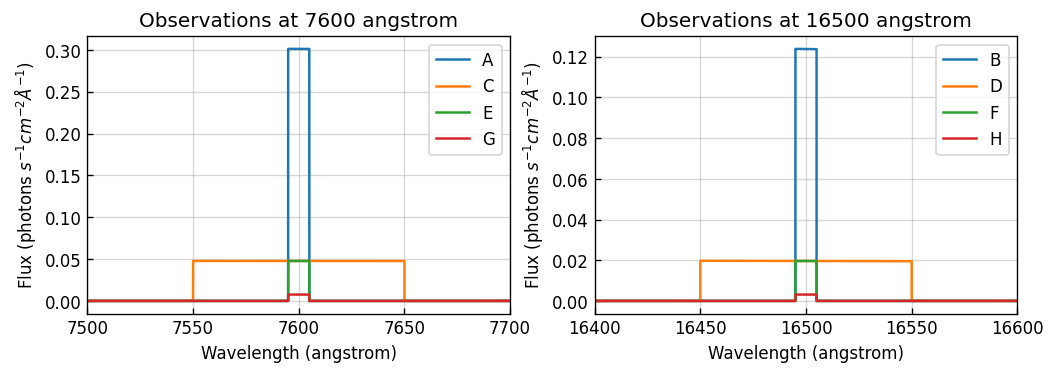

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
for host, obs in observations.items():
    if obs.bandpass.center == 7600:
        ax[0].plot(obs.wave, obs.flux, label=host)
    elif obs.bandpass.center == 16500:
        ax[1].plot(obs.wave, obs.flux, label=host)

for axx, bp in zip(ax, [bp1, bp2]):
    axx.set(
        xlim=(bp.center - 100, bp.center + 100),
        xticks=np.linspace(bp.center - 100, bp.center + 100, 5),
        xlabel=f"Wavelength ({bp.waveunits})",
        ylabel=r"Flux (photons $s^{-1}cm^{-2}\AA^{-1}$)",
        title=f"Observations at {bp.center} {bp.waveunits}",
    )
    axx.legend(loc="upper right")
    axx.grid(alpha=0.5)

plt.show()

## Finding the Count Rate
Looks good! Now we can calculate the count rate using the `integrate` method of the `Observation` object. This sums the flux over the wavelength range of the filter, giving a flux value in units of photons per second per square centimetre. We can then multiply this by the primary mirror area to get the total count rate in photons per second. This will be the photon count rate at the pupil plane.

In [27]:
for host, obs in observations.items():
    countrate = obs.integrate()
    print(
        f"{host}: {obs.integrate():.3e} photons/s/cm/cm; {obs.integrate()*primary:.3e} photons/s"
    )

A: 3.012e+00 photons/s/cm/cm; 3.012e+05 photons/s
B: 1.239e+00 photons/s/cm/cm; 1.239e+05 photons/s
C: 4.773e+00 photons/s/cm/cm; 4.773e+05 photons/s
D: 1.962e+00 photons/s/cm/cm; 1.962e+05 photons/s
E: 4.773e-01 photons/s/cm/cm; 4.773e+04 photons/s
F: 1.964e-01 photons/s/cm/cm; 1.964e+04 photons/s
G: 7.565e-02 photons/s/cm/cm; 7.565e+03 photons/s
H: 3.112e-02 photons/s/cm/cm; 3.112e+03 photons/s
